In [198]:
import os
os.getcwd()



'C:\\Users\\Sam\\OneDrive\\Desktop\\Job_market_intelligence'

In [199]:
os.chdir(r"C:\Users\Sam\OneDrive\Desktop\Job_market_intelligence")


In [200]:
os.getcwd()


'C:\\Users\\Sam\\OneDrive\\Desktop\\Job_market_intelligence'

In [201]:
os.listdir("Data")


['DataAnalyst_Jobs.csv',
 'DataScience_salaries_2025.csv',
 'data_science_jobs_indeed_usa.csv',
 'data_science_job_posts_2025.csv',
 'ds_salaries.csv',
 'glassdoor-data-engineer-2023.csv']

In [202]:
import pandas as pd

#df1 = pd.read_csv("Data/data_science_jobs_indeed_usa.csv")
#df2 = pd.read_csv("Data/DataAnalyst_Jobs.csv")
#df3 = pd.read_csv("Data/DataScience_salaries_2025.csv")
#df5 = pd.read_csv("Data/glassdoor-data-engineer-2023.csv")
df_salary = pd.read_csv("Data/ds_salaries.csv")

In [203]:
df_salary.shape
df_salary.columns
df_salary['job_title'].value_counts().head(20)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
AI Scientist                    7
Data Science Consultant         7
Director of Data Science        7
Data Analytics Manager          7
ML Engineer                     6
Computer Vision Engineer        6
BI Data Analyst                 6
Lead Data Engineer              6
Data Engineering Manager        5
Business Data Analyst           5
Name: count, dtype: int64

In [204]:
core_roles = ["Data Scientist", "Data Engineer", "Data Analyst"]

df_salary = df_salary[df_salary["job_title"].isin(core_roles)]

df_salary["job_title"].value_counts()


job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

In [205]:
df_salary.shape

(372, 12)

In [206]:
df_salary.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [207]:
df_salary.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L


In [208]:
df_salary.drop(columns=["Unnamed: 0", "salary", "salary_currency"], inplace=True)

df_salary

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
5,2020,EN,FT,Data Analyst,72000,US,100,US,L
7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,40481,IN,0,IN,L
...,...,...,...,...,...,...,...,...,...
601,2022,EN,FT,Data Analyst,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M


In [209]:
df_salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [210]:
df_salary["salary_in_usd"].describe()

count       372.000000
mean     105809.642473
std       56762.525012
min        2859.000000
25%       65009.750000
50%      100000.000000
75%      140000.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

In [211]:
df_salary.groupby("job_title")["salary_in_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analyst,97.0,92893.061856,39961.075848,6072.0,62000.0,90320.0,116150.0,200000.0
Data Engineer,132.0,112725.000000,57629.082107,4000.0,70039.5,105500.0,154600.0,324000.0
Data Scientist,143.0,108187.832168,64112.840519,2859.0,54724.0,103691.0,140850.0,412000.0


In [212]:
df_salary['remote_ratio'].value_counts()


remote_ratio
100    242
0       87
50      43
Name: count, dtype: int64

In [213]:
df_salary = df_salary[df_salary["salary_in_usd"] >= 20000]


#df_salary=df_salary[df_salary["salary_in_usd"] <= 30000]


In [214]:
df_salary.describe()

,work_year,salary_in_usd,remote_ratio
count,358.000000,358.000000,358.000000
mean,2021.564246,109572.645251,71.648045
std,0.669509,54499.349085,41.832253
min,2020.000000,20000.000000,0.000000
25%,2021.000000,69084.000000,50.000000
50%,2022.000000,102895.500000,100.000000
75%,2022.000000,140000.000000,100.000000
max,2022.000000,412000.000000,100.000000


In [215]:
(df_salary["employee_residence"] == df_salary["company_location"]).mean()



0.9497206703910615

In [216]:
df_salary.drop(columns=["employee_residence"], inplace=True)


C:\Users\Sam\AppData\Local\Temp\ipykernel_25956\2775904195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.drop(columns=["employee_residence"], inplace=True)


In [217]:
df_salary["remote_type"] = df_salary["remote_ratio"].map({
    0: "Onsite",
    50: "Hybrid",
    100: "Remote"
})


C:\Users\Sam\AppData\Local\Temp\ipykernel_25956\110596271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary["remote_type"] = df_salary["remote_ratio"].map({


In [196]:
df_salary["remote_type"].value_counts()


remote_type
Remote    236
Onsite     81
Hybrid     41
Name: count, dtype: int64

In [219]:
df_salary.drop(columns=["remote_ratio"],axis=1,inplace=True)

C:\Users\Sam\AppData\Local\Temp\ipykernel_25956\2494630646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.drop(columns=["remote_ratio"],axis=1,inplace=True)


In [220]:
df_salary

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,remote_type
0,2020,MI,FT,Data Scientist,79833,DE,L,Onsite
5,2020,EN,FT,Data Analyst,72000,US,L,Remote
7,2020,MI,FT,Data Scientist,35735,HU,L,Hybrid
10,2020,EN,FT,Data Scientist,51321,FR,S,Onsite
11,2020,MI,FT,Data Scientist,40481,IN,L,Onsite
...,...,...,...,...,...,...,...,...
601,2022,EN,FT,Data Analyst,52000,CA,M,Onsite
602,2022,SE,FT,Data Engineer,154000,US,M,Remote
603,2022,SE,FT,Data Engineer,126000,US,M,Remote
604,2022,SE,FT,Data Analyst,129000,US,M,Onsite


In [222]:
for col in ["experience_level","employment_type","job_title","company_location","company_size","remote_type"]:
    print(col)
    #print(df_salary[col].value_counts())

experience_level
employment_type
job_title
company_location
company_size
remote_type


In [225]:
df_salary=df_salary[df_salary["employment_type"]=="FT"]
df_salary

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,remote_type
0,2020,MI,FT,Data Scientist,79833,DE,L,Onsite
5,2020,EN,FT,Data Analyst,72000,US,L,Remote
7,2020,MI,FT,Data Scientist,35735,HU,L,Hybrid
10,2020,EN,FT,Data Scientist,51321,FR,S,Onsite
11,2020,MI,FT,Data Scientist,40481,IN,L,Onsite
...,...,...,...,...,...,...,...,...
601,2022,EN,FT,Data Analyst,52000,CA,M,Onsite
602,2022,SE,FT,Data Engineer,154000,US,M,Remote
603,2022,SE,FT,Data Engineer,126000,US,M,Remote
604,2022,SE,FT,Data Analyst,129000,US,M,Onsite


In [226]:
df_salary["employment_type"].value_counts()

employment_type
FT    352
Name: count, dtype: int64

In [227]:
df_salary["company_location"] = df_salary["company_location"].apply(
    lambda x: x if x in ["US", "GB", "CA"] else "Other"
)


In [229]:
df_salary["company_location"].value_counts()

company_location
US       237
Other     65
GB        36
CA        14
Name: count, dtype: int64

In [230]:
df_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,remote_type
0,2020,MI,FT,Data Scientist,79833,Other,L,Onsite
5,2020,EN,FT,Data Analyst,72000,US,L,Remote
7,2020,MI,FT,Data Scientist,35735,Other,L,Hybrid
10,2020,EN,FT,Data Scientist,51321,Other,S,Onsite
11,2020,MI,FT,Data Scientist,40481,Other,L,Onsite


In [240]:
X= df_salary.drop(columns=["salary_in_usd"])
y=df_salary["salary_in_usd"]

In [241]:
categorical_cols = [
    "experience_level",
    "job_title",
    "company_location",
    "company_size",
    "remote_type"
]
numeric_cols = ["work_year"]

In [242]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 28824.304121598117
R2: 0.502351566808187


In [243]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))


RF MAE: 28256.405120840693
RF R2: 0.5367352735360448


In [244]:
# Get feature names after one-hot encoding
feature_names = (
    rf_model.named_steps["preprocessor"]
    .get_feature_names_out()
)

# Get importance
importances = rf_model.named_steps["regressor"].feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(15)


,feature,importance
7,cat__company_location_US,0.467529
12,num__work_year,0.080777
2,cat__experience_level_SE,0.075117
4,cat__job_title_Data Scientist,0.067344
9,cat__company_size_S,0.057540
0,cat__experience_level_EX,0.057411
3,cat__job_title_Data Engineer,0.055686
11,cat__remote_type_Remote,0.035950
8,cat__company_size_M,0.034858
1,cat__experience_level_MI,0.026593


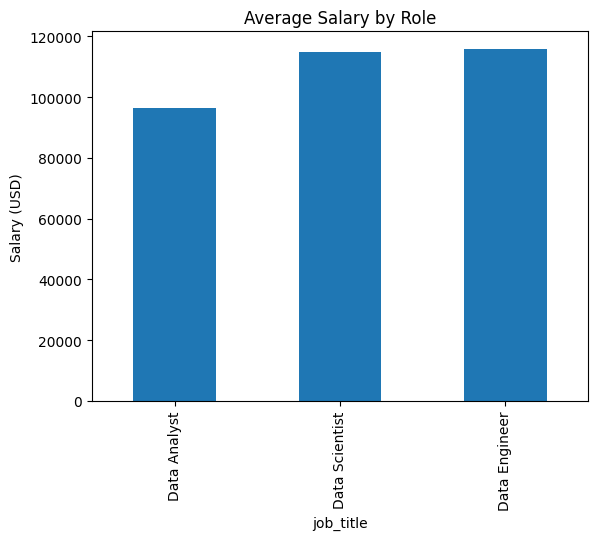

In [245]:
import matplotlib.pyplot as plt

df_salary.groupby("job_title")["salary_in_usd"].mean().sort_values().plot(kind="bar")
plt.title("Average Salary by Role")
plt.ylabel("Salary (USD)")
plt.show()


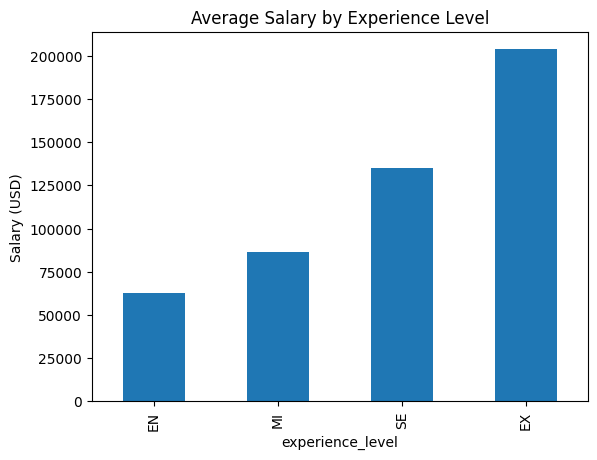

In [246]:
df_salary.groupby("experience_level")["salary_in_usd"].mean().sort_values().plot(kind="bar")
plt.title("Average Salary by Experience Level")
plt.ylabel("Salary (USD)")
plt.show()


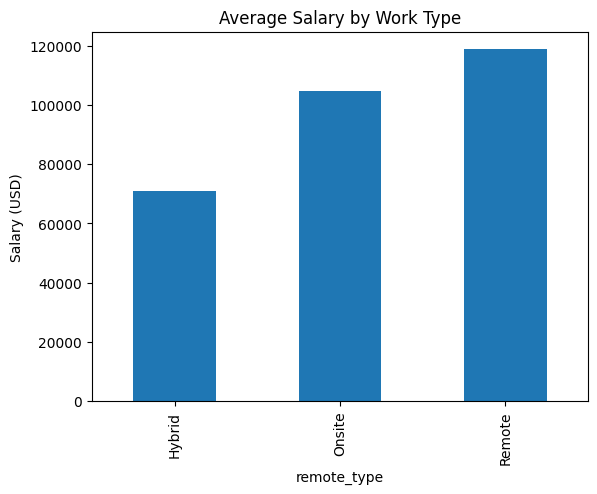

In [247]:
df_salary.groupby("remote_type")["salary_in_usd"].mean().plot(kind="bar")
plt.title("Average Salary by Work Type")
plt.ylabel("Salary (USD)")
plt.show()


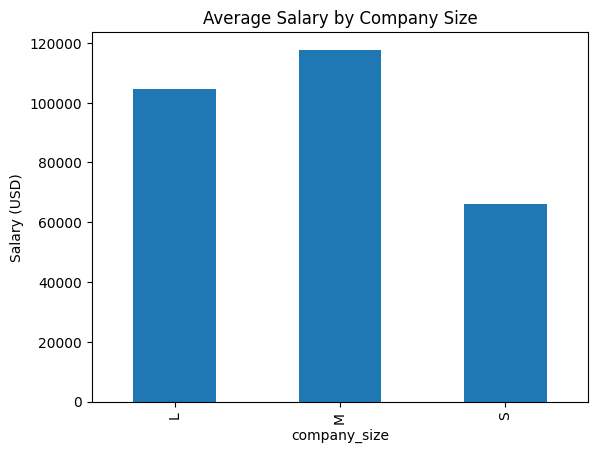

In [248]:
df_salary.groupby("company_size")["salary_in_usd"].mean().plot(kind="bar")
plt.title("Average Salary by Company Size")
plt.ylabel("Salary (USD)")
plt.show()


In [249]:
df_salary.groupby("remote_type")["salary_in_usd"].mean()


remote_type
Hybrid     70882.947368
Onsite    104678.325000
Remote    118772.743590
Name: salary_in_usd, dtype: float64

In [250]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\Sam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
